conda install -c conda-forge liac-arff
pip install scipy

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import arff

In [4]:
# load the ARFF file
with open('Data\Training_Dataset.arff', 'r') as f:
    data, meta = arff.loadarff(f)

# convert to list of lists
data_list = data.tolist()

# convert to pandas DataFrame
df = pd.DataFrame(data_list)

# add attribute names as columns
df.columns = meta.names()

# iterate over the DataFrame and convert each value to a string
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.decode() if type(x) == bytes else x)

df = df.astype(float)

# save the DataFrame to a new csv file
# df.to_csv('Data/new_file.csv', index=False)

# split the dataframe into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Result', axis=1), df['Result'], test_size=0.25)

# count how many records are there in DataFrame
num_rows = df.shape[0]

# count how many records are there in train DataFrame
num_rows_train = X_train.shape[0]

# count how many records are there in DataFrame
num_rows_test = X_test.shape[0]

print('Train df size is :' , num_rows_train)
print('Test df size is :' , num_rows_test)
print('Whole df size is :' ,num_rows)
print('Test df + Train df size is :' , num_rows_train + num_rows_test)

Train df size is : 8291
Test df size is : 2764
Whole df size is : 11055
Test df + Train df size is : 11055


In [5]:
# liczenie ilości próbek w każdej z klas
class_counts = df['Result'].value_counts()

# obliczenie proporcji próbek w każdej z klas
class_proportions = class_counts / class_counts.sum()

print(class_proportions)

 1.0    0.556943
-1.0    0.443057
Name: Result, dtype: float64


In [6]:
# get a list of all the column names
attributes_test = df.columns.tolist()

# print the list of column names
print(attributes_test)

['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result']


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8291 entries, 6373 to 3454
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   having_IP_Address            8291 non-null   float64
 1   URL_Length                   8291 non-null   float64
 2   Shortining_Service           8291 non-null   float64
 3   having_At_Symbol             8291 non-null   float64
 4   double_slash_redirecting     8291 non-null   float64
 5   Prefix_Suffix                8291 non-null   float64
 6   having_Sub_Domain            8291 non-null   float64
 7   SSLfinal_State               8291 non-null   float64
 8   Domain_registeration_length  8291 non-null   float64
 9   Favicon                      8291 non-null   float64
 10  port                         8291 non-null   float64
 11  HTTPS_token                  8291 non-null   float64
 12  Request_URL                  8291 non-null   float64
 13  URL_of_Anchor  

In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 4685 to 6765
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   having_IP_Address            2764 non-null   float64
 1   URL_Length                   2764 non-null   float64
 2   Shortining_Service           2764 non-null   float64
 3   having_At_Symbol             2764 non-null   float64
 4   double_slash_redirecting     2764 non-null   float64
 5   Prefix_Suffix                2764 non-null   float64
 6   having_Sub_Domain            2764 non-null   float64
 7   SSLfinal_State               2764 non-null   float64
 8   Domain_registeration_length  2764 non-null   float64
 9   Favicon                      2764 non-null   float64
 10  port                         2764 non-null   float64
 11  HTTPS_token                  2764 non-null   float64
 12  Request_URL                  2764 non-null   float64
 13  URL_of_Anchor  

In [10]:
# # Convert the test data into a format that can be used by the perceptron
# X_test = test_df.values
#
# # Encode the categorical variables in the test data
# encoder = LabelEncoder()
# for i in range(X_train.shape[1]):
#     if type(X_train[0, i]) is str:
#         X_train[:, i] = encoder.fit_transform(X_train[:, i])
#         X_test[:, i] = encoder.transform(X_test[:, i])
#
# # Make predictions on the test data
# y_pred = perceptron.predict(X_test)
#
# correct_predictions = (y_pred == result_test_df).sum()
#
#
# print(correct_predictions , 'out of ',num_rows_test)
# print(correct_predictions / num_rows_test)

1453 out of  2764
0.5256874095513748


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
import shap

# Tworzenie sieci
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) # warstwa wejściowa, 32 neuronów, 31 wejść
model.add(Dense(16, activation='relu')) # pierwsza warstwa ukryta, 16 neuronów
model.add(Dense(8, activation='relu')) # druga warstwa ukryta, 8 neuronów
model.add(Dense(1, activation='sigmoid')) # warstwa wyjściowa, 1 neuron, funkcja aktywacji sigmoid

optimizer = Adam(learning_rate=0.001)

# Kompilacja sieci
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train,y_train, epochs =20, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/20
260/260 [==============================] - 2s 2ms/step - loss: -4.7821 - accuracy: 0.3035 - val_loss: -30.7802 - val_accuracy: 0.3068
Epoch 2/20
260/260 [==============================] - 0s 2ms/step - loss: -279.7307 - accuracy: 0.3033 - val_loss: -868.3437 - val_accuracy: 0.2884
Epoch 3/20
260/260 [==============================] - 0s 2ms/step - loss: -2528.1104 - accuracy: 0.2974 - val_loss: -5393.6738 - val_accuracy: 0.2887
Epoch 4/20
260/260 [==============================] - 0s 2ms/step - loss: -10356.7773 - accuracy: 0.2889 - val_loss: -18117.0293 - val_accuracy: 0.2920
Epoch 5/20
260/260 [==============================] - 0s 2ms/step - loss: -28437.2871 - accuracy: 0.2885 - val_loss: -44013.2383 - val_accuracy: 0.2941
Epoch 6/20
260/260 [==============================] - 0s 2ms/step - loss: -61797.3906 - accuracy: 0.2908 - val_loss: -88592.1875 - val_accuracy: 0.2876
Epoch 7/20
260/260 [==============================] - 0s 2ms/step - loss: -115662.0938 - accuracy: 0.

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.


AttributeError: Exception encountered when calling layer 'sequential_5' (type Sequential).

'tuple' object has no attribute 'rank'

Call arguments received by layer 'sequential_5' (type Sequential):
  • inputs=['      having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \\\n8175                1.0         1.0                -1.0               1.0   \n6290                1.0        -1.0                 1.0               1.0   \n6579                1.0        -1.0                 1.0               1.0   \n7107               -1.0        -1.0                 1.0               1.0   \n3186                1.0         1.0                 1.0               1.0   \n...                 ...         ...                 ...               ...   \n7490               -1.0        -1.0                 1.0               1.0   \n1448                1.0        -1.0                 1.0               1.0   \n1857                1.0        -1.0                 1.0               1.0   \n309                 1.0        -1.0                 1.0               1.0   \n4452                1.0        -1.0                 1.0               1.0   \n\n      double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \\\n8175                      -1.0           -1.0               -1.0   \n6290                       1.0            1.0                1.0   \n6579                       1.0           -1.0                1.0   \n7107                       1.0           -1.0               -1.0   \n3186                       1.0           -1.0               -1.0   \n...                        ...            ...                ...   \n7490                       1.0           -1.0                1.0   \n1448                       1.0           -1.0                0.0   \n1857                       1.0           -1.0               -1.0   \n309                        1.0           -1.0               -1.0   \n4452                       1.0           -1.0                1.0   \n\n      SSLfinal_State  Domain_registeration_length  Favicon  ...  RightClick  \\\n8175             1.0                          1.0      1.0  ...         1.0   \n6290             1.0                         -1.0      1.0  ...         1.0   \n6579             1.0                          1.0      1.0  ...         1.0   \n7107            -1.0                          1.0      1.0  ...         1.0   \n3186             1.0                         -1.0      1.0  ...         1.0   \n...              ...                          ...      ...  ...         ...   \n7490             1.0                         -1.0      1.0  ...         1.0   \n1448            -1.0                          1.0      1.0  ...         1.0   \n1857            -1.0                          1.0      1.0  ...         1.0   \n309              1.0                         -1.0      1.0  ...         1.0   \n4452             1.0                         -1.0     -1.0  ...         1.0   \n\n      popUpWidnow  Iframe  age_of_domain  DNSRecord  web_traffic  Page_Rank  \\\n8175          1.0     1.0            1.0        1.0          0.0       -1.0   \n6290          1.0     1.0           -1.0        1.0          0.0        1.0   \n6579          1.0     1.0           -1.0        1.0          1.0        1.0   \n7107          1.0     1.0           -1.0        1.0          1.0        1.0   \n3186          1.0     1.0           -1.0       -1.0          0.0       -1.0   \n...           ...     ...            ...        ...          ...        ...   \n7490          1.0     1.0           -1.0        1.0          1.0        1.0   \n1448          1.0     1.0           -1.0       -1.0          1.0       -1.0   \n1857          1.0     1.0           -1.0       -1.0         -1.0       -1.0   \n309           1.0     1.0            1.0       -1.0          1.0       -1.0   \n4452         -1.0     1.0           -1.0       -1.0          0.0       -1.0   \n\n      Google_Index  Links_pointing_to_page  Statistical_report  \n8175          -1.0                     0.0                 1.0  \n6290           1.0                     0.0                 1.0  \n6579           1.0                     0.0                -1.0  \n7107           1.0                     1.0                 1.0  \n3186          -1.0                     0.0                -1.0  \n...            ...                     ...                 ...  \n7490           1.0                     1.0                 1.0  \n1448          -1.0                     0.0                 1.0  \n1857           1.0                     0.0                 1.0  \n309            1.0                     1.0                 1.0  \n4452           1.0                     0.0                -1.0  \n\n[8291 rows x 30 columns]']
  • training=None
  • mask=None

In [55]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import SelectFromModel
#
# # Tworzenie modelu drzewa decyzyjnego
# tree_model = DecisionTreeClassifier()
#
# # Uczenie modelu na danych treningowych
# tree_model.fit(X_train, y_train)
#
# # Selekcja cech za pomocą SelectFromModel
# selector = SelectFromModel(tree_model, threshold='mean')
# selector.fit(X_train, y_train)
#
# # Ocena modelu na danych testowych
# # test_acc = tree_model.score(X_test, y_test)
# # print('Test accuracy: ', test_acc)
#
# # Wybieranie cech za pomocą .transform()
# X_train_important = selector.transform(X_train)
# X_test_important = selector.transform(X_test)

Dokładność dla zbioru treningowego: 0.99
Dokładność dla zbioru testowego: 0.96


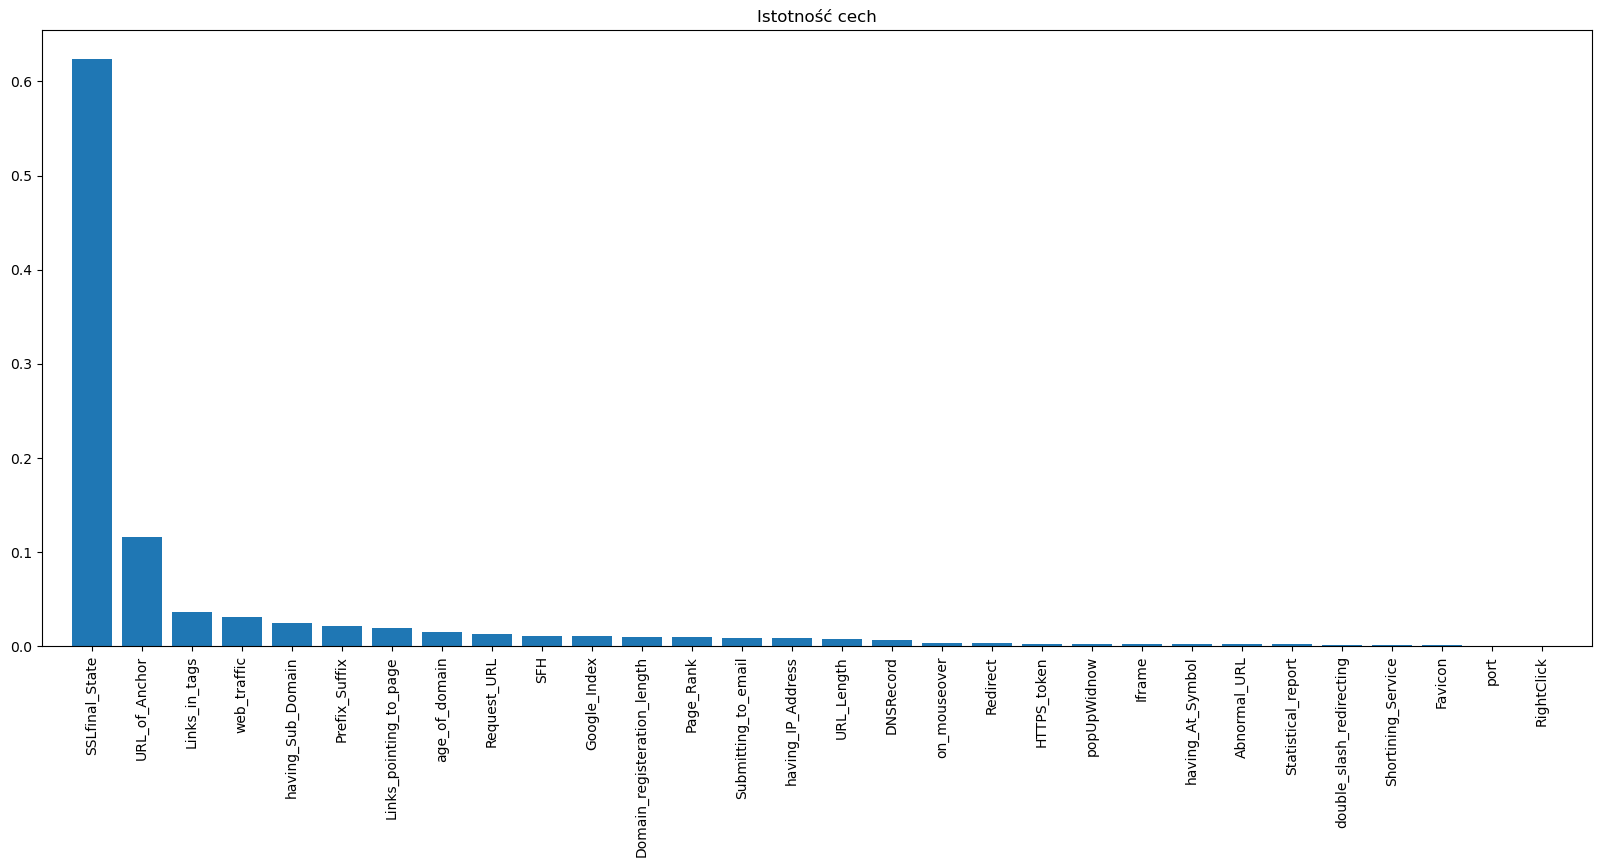

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Tworzenie i trenowanie modelu drzewa decyzyjnego
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Obliczanie dokładności dla zbioru treningowego
train_acc = accuracy_score(y_train, decision_tree.predict(X_train))
print("Dokładność dla zbioru treningowego: {:.2f}".format(train_acc))

# Obliczanie dokładności dla zbioru testowego
test_acc = accuracy_score(y_test, decision_tree.predict(X_test))
print("Dokładność dla zbioru testowego: {:.2f}".format(test_acc))

# Pobieranie istotności cech
importances = decision_tree.feature_importances_

# sortowanie cech według ich istotności
indices = np.argsort(importances)[::-1]

# tworzenie wykresu
plt.figure(figsize=(20, 8))
plt.title("Istotność cech")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], fontsize=10,rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Dokładność dla zbioru treningowego: 0.99
Dokładność dla zbioru testowego: 0.97


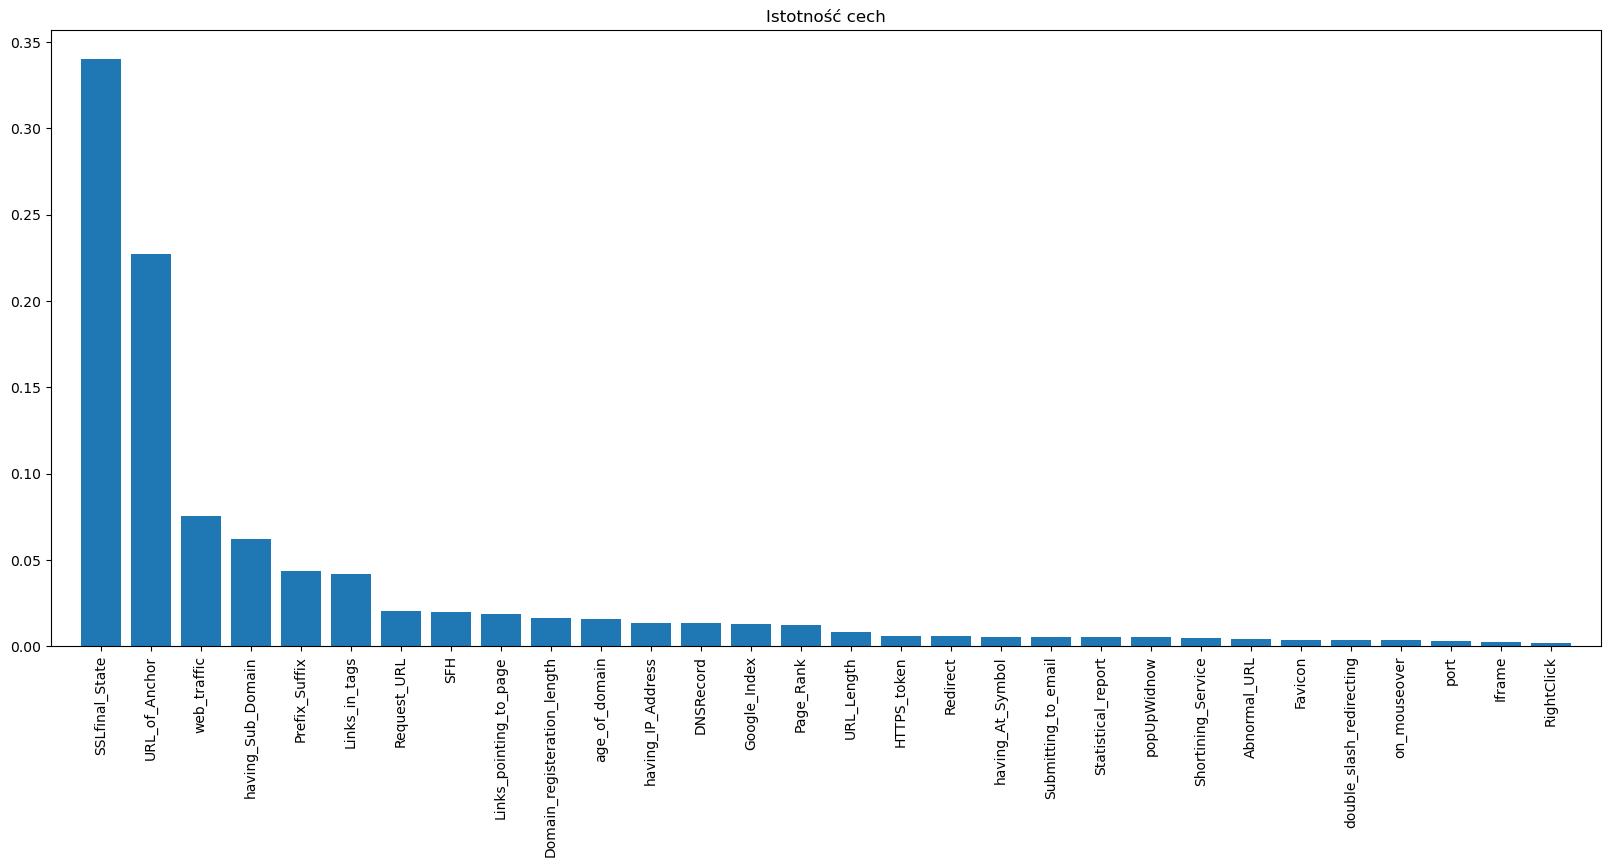

In [77]:

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Tworzenie i trenowanie modelu drzewa decyzyjnego
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Obliczanie dokładności dla zbioru treningowego
train_acc = accuracy_score(y_train, random_forest.predict(X_train))
print("Dokładność dla zbioru treningowego: {:.2f}".format(train_acc))

# Obliczanie dokładności dla zbioru testowego
test_acc = accuracy_score(y_test, random_forest.predict(X_test))
print("Dokładność dla zbioru testowego: {:.2f}".format(test_acc))

# Pobieranie istotności cech
importances = random_forest.feature_importances_

# sortowanie cech według ich istotności
indices = np.argsort(importances)[::-1]

# tworzenie wykresu
plt.figure(figsize=(20, 8))
plt.title("Istotność cech")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], fontsize=10,rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

[0]	validation_0-logloss:0.49371
[1]	validation_0-logloss:0.38200
[2]	validation_0-logloss:0.31239
[3]	validation_0-logloss:0.26515
[4]	validation_0-logloss:0.23226
[5]	validation_0-logloss:0.20654
[6]	validation_0-logloss:0.19004
[7]	validation_0-logloss:0.17680
[8]	validation_0-logloss:0.16579
[9]	validation_0-logloss:0.15741
[10]	validation_0-logloss:0.14924
[11]	validation_0-logloss:0.14261
[12]	validation_0-logloss:0.13725
[13]	validation_0-logloss:0.13152
[14]	validation_0-logloss:0.12802
[15]	validation_0-logloss:0.12363
[16]	validation_0-logloss:0.12122
[17]	validation_0-logloss:0.11945
[18]	validation_0-logloss:0.11734
[19]	validation_0-logloss:0.11473


C:\Users\Madzia\anaconda3\envs\env_tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Madzia\anaconda3\envs\env_tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-logloss:0.11076
[21]	validation_0-logloss:0.10916
[22]	validation_0-logloss:0.10714
[23]	validation_0-logloss:0.10583
[24]	validation_0-logloss:0.10478
[25]	validation_0-logloss:0.10369
[26]	validation_0-logloss:0.10012
[27]	validation_0-logloss:0.09850
[28]	validation_0-logloss:0.09816
[29]	validation_0-logloss:0.09647
[30]	validation_0-logloss:0.09595
[31]	validation_0-logloss:0.09467
[32]	validation_0-logloss:0.09394
[33]	validation_0-logloss:0.09290
[34]	validation_0-logloss:0.09232
[35]	validation_0-logloss:0.09100
[36]	validation_0-logloss:0.09072
[37]	validation_0-logloss:0.09043
[38]	validation_0-logloss:0.08870
[39]	validation_0-logloss:0.08780
[40]	validation_0-logloss:0.08665
[41]	validation_0-logloss:0.08530
[42]	validation_0-logloss:0.08463
[43]	validation_0-logloss:0.08399
[44]	validation_0-logloss:0.08355
[45]	validation_0-logloss:0.08304
[46]	validation_0-logloss:0.08309
[47]	validation_0-logloss:0.08281
[48]	validation_0-logloss:0.08228
[49]	validatio

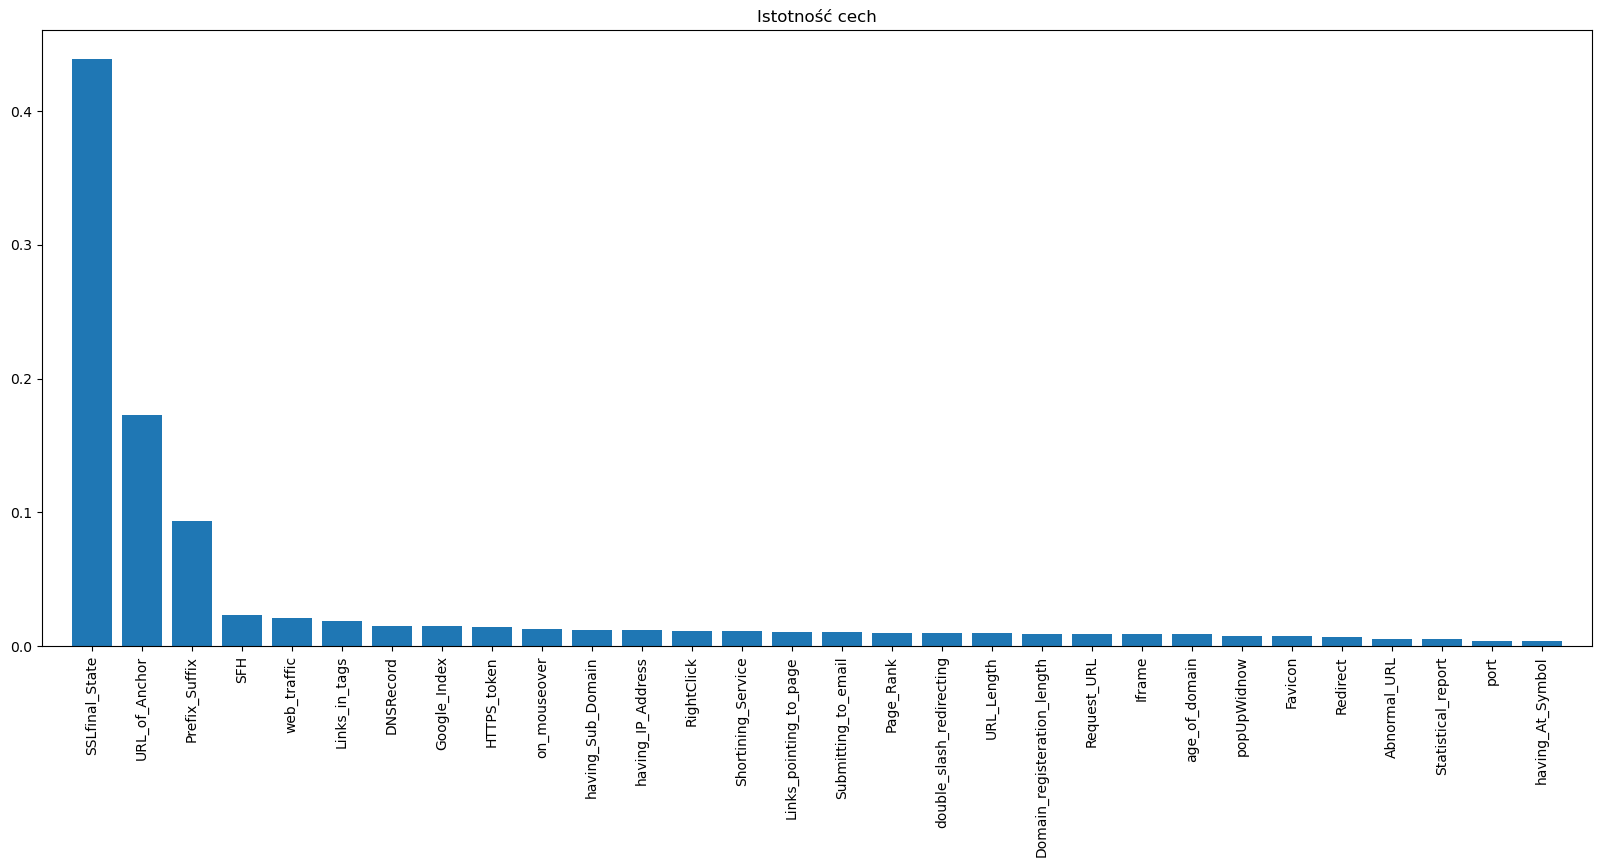

In [13]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

xgb_clf  = xgb.XGBClassifier()
xgb_clf .fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='logloss')

#
y_pred = xgb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

importances = xgb_clf.feature_importances_

# xgb.plot_importance(xgb_clf)
# plt.show()
#
# sortowanie cech według ich istotności
indices = np.argsort(importances)[::-1]

# tworzenie wykresu
plt.figure(figsize=(20, 8))
plt.title("Istotność cech")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], fontsize=10,rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()